In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import randint
import math
import time
import random

import plotly.express as px
from matplotlib.pyplot import figure, savefig, show, show, subplots, Axes, title
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.figure_factory as ff

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import class_weight
from sklearn.feature_selection import RFE
!pip install shap==0.40.0
import shap 

import warnings
#Ignore warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv('Bank.csv')

In [4]:
data.head(5)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


# Data Shape

In [5]:
data.shape


(6819, 95)

# Finding Null Values in each ROW

In [6]:

data[data.isnull().any(axis=1)]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt


# Dataset Information

In [7]:
# Dataset Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

# Duplicated Values in Dataset

In [8]:
data.duplicated().sum()

0

0    6599
1     220
Name: Bankrupt, dtype: int64
 


<AxesSubplot:ylabel='Bankrupt'>

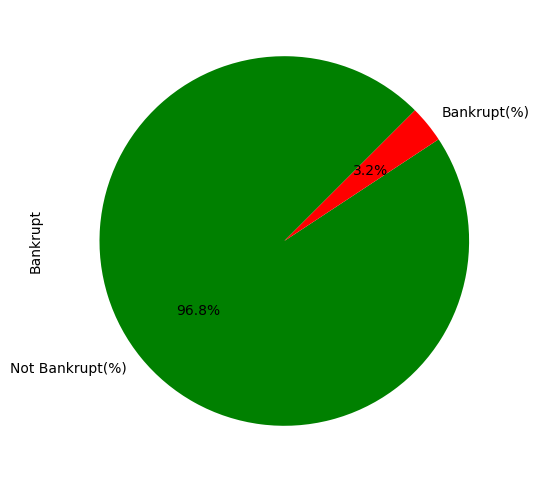

In [9]:
#Analyzing Target variable (Class: 0 = Not Bankrupt, 1 = Bankrupt) 

print(data['Bankrupt'].value_counts())
print(" ")

data['Bankrupt'].value_counts().plot(
    kind='pie',figsize=(12,6),autopct="%1.1f%%",startangle=45,
    labels=['Not Bankrupt(%)','Bankrupt(%)'],colors=['green','red'],explode=[0,0]
                              )

# Dataset Describe

In [10]:
# Dataset Describe

data.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Unique Values

In [11]:
# Check Unique Values for each Column.

{column: len(data[column].unique()) for column in data.columns}

{' ROA(C) before interest and depreciation before interest': 3333,
 ' ROA(A) before interest and % after tax': 3151,
 ' ROA(B) before interest and depreciation after tax': 3160,
 ' Operating Gross Margin': 3781,
 ' Realized Sales Gross Margin': 3788,
 ' Operating Profit Rate': 3376,
 ' Pre-tax net Interest Rate': 3789,
 ' After-tax net Interest Rate': 3604,
 ' Non-industry income and expenditure/revenue': 2551,
 ' Continuous interest rate (after tax)': 3617,
 ' Operating Expense Rate': 2966,
 ' Research and development expense rate': 1536,
 ' Cash flow rate': 5557,
 ' Interest-bearing debt interest rate': 1080,
 ' Tax rate (A)': 2488,
 ' Net Value Per Share (B)': 2278,
 ' Net Value Per Share (A)': 2285,
 ' Net Value Per Share (C)': 2284,
 ' Persistent EPS in the Last Four Seasons': 1358,
 ' Cash Flow Per Share': 1545,
 ' Revenue Per Share (Yuan �': 3807,
 ' Operating Profit Per Share (Yuan �': 1236,
 ' Per Share Net profit before tax (Yuan �': 1522,
 ' Realized Sales Gross Profit Growt

In [12]:
color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Visualization - 2 Analisis of Liability - Assets of a company.

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

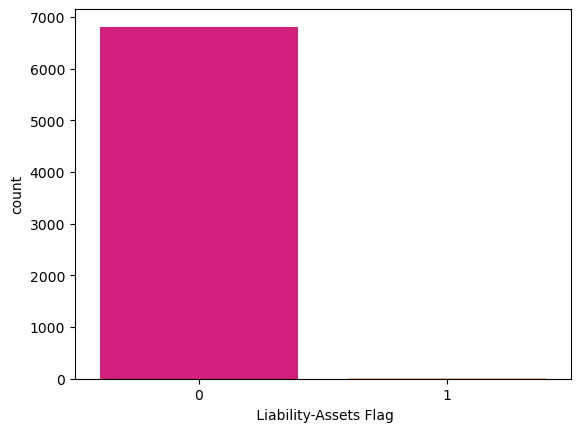

In [13]:
print(data[' Liability-Assets Flag'].value_counts())

sns.countplot(' Liability-Assets Flag',data=data, palette=color[1])

The "Liability-Assets" flag denotes the status of an organization, 
where if the total liability is more that total assets, the flagged value will be 1, else the value is 0. 
A majority number of times, organizations/company's assets are more than their liabilities.

Assets are the items your company owns that can provide future economic benefit. Liabilities are what you owe other parties. 
In short, assets put money in your pocket, and liabilities take money out!

# Visualization - 3 Analisis of Liability - Assets with Bankrupt.

 Liability-Assets Flag  Bankrupt
0                       0           6597
                        1            214
1                       1              6
                        0              2
dtype: int64


<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

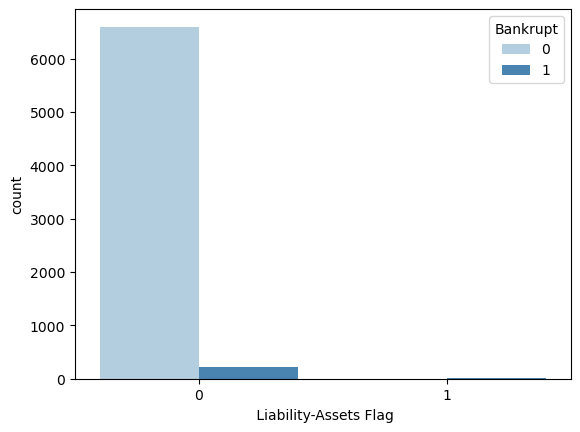

In [14]:
print(data[[' Liability-Assets Flag','Bankrupt']].value_counts())


sns.countplot(x = ' Liability-Assets Flag',hue = 'Bankrupt',data = data, palette=color[2])

On the above graph we can odserve:
    A small portion of organizations suffers bankruptcy, although more assets than their liabilities.

# Visualization - 4 Boxplot on Operating Profit Rate with Bankrupt

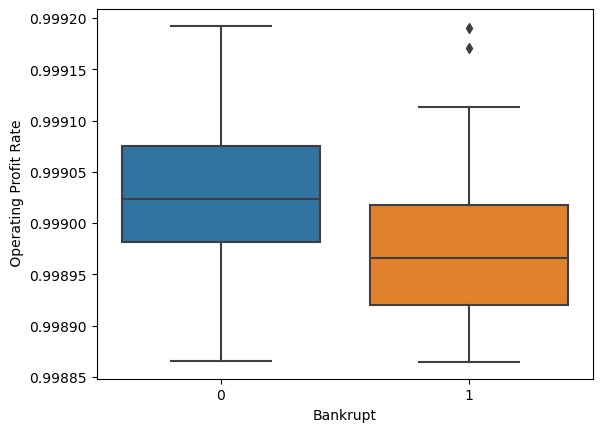

In [15]:
q1,q3 = data[" Operating Profit Rate"].quantile([0.1,0.9])
mask=data[" Operating Profit Rate"].between(q1,q3)
sns.boxplot(x="Bankrupt",y=" Operating Profit Rate", data=data[mask]);

The Above graph shows that the the data is skewed

# visualization - 5 Data is symmetric or is not symmetric

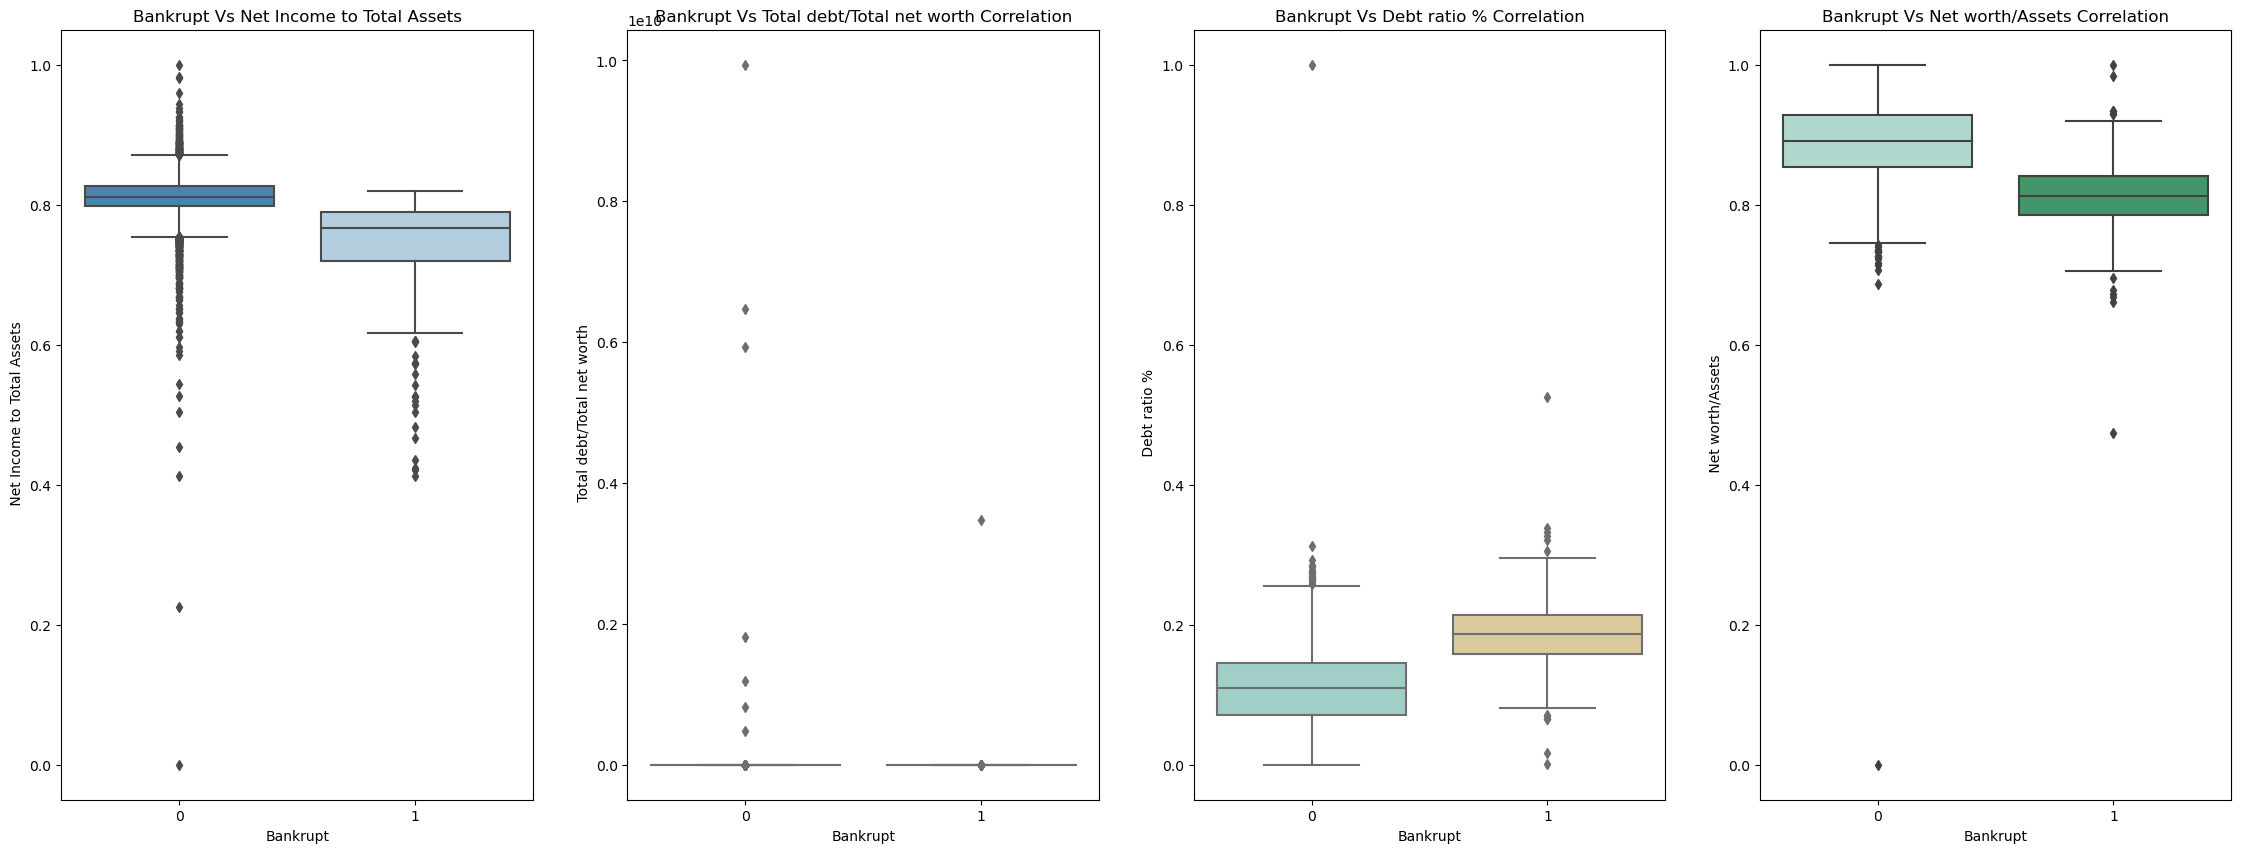

In [16]:
f, axes=plt.subplots(ncols=4, figsize=(28, 10))

sns.boxplot(x='Bankrupt', y=' Net Income to Total Assets', data=data, ax=axes[0],palette = color[3])
axes[0].set_title('Bankrupt Vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt', y=' Total debt/Total net worth', data=data, ax=axes[1],palette = color[4])
axes[1].set_title('Bankrupt Vs Total debt/Total net worth Correlation')

sns.boxplot(x='Bankrupt', y=' Debt ratio %', data=data, ax=axes[2],palette = color[5])
axes[2].set_title('Bankrupt Vs Debt ratio % Correlation')

sns.boxplot(x='Bankrupt', y=' Net worth/Assets', data=data, ax=axes[3],palette = color[6])
axes[3].set_title('Bankrupt Vs Net worth/Assets Correlation')

plt.show()

Data is not symmetric and is skewed and also it can be seen that there are a lot multicollinearity issues, skewed features, and the data is imbalanced. With all that in mind for this model it is better not to use regression (logistic regression), it is better to use decision tree model.

# Visualization - 6 variation in the data distribution

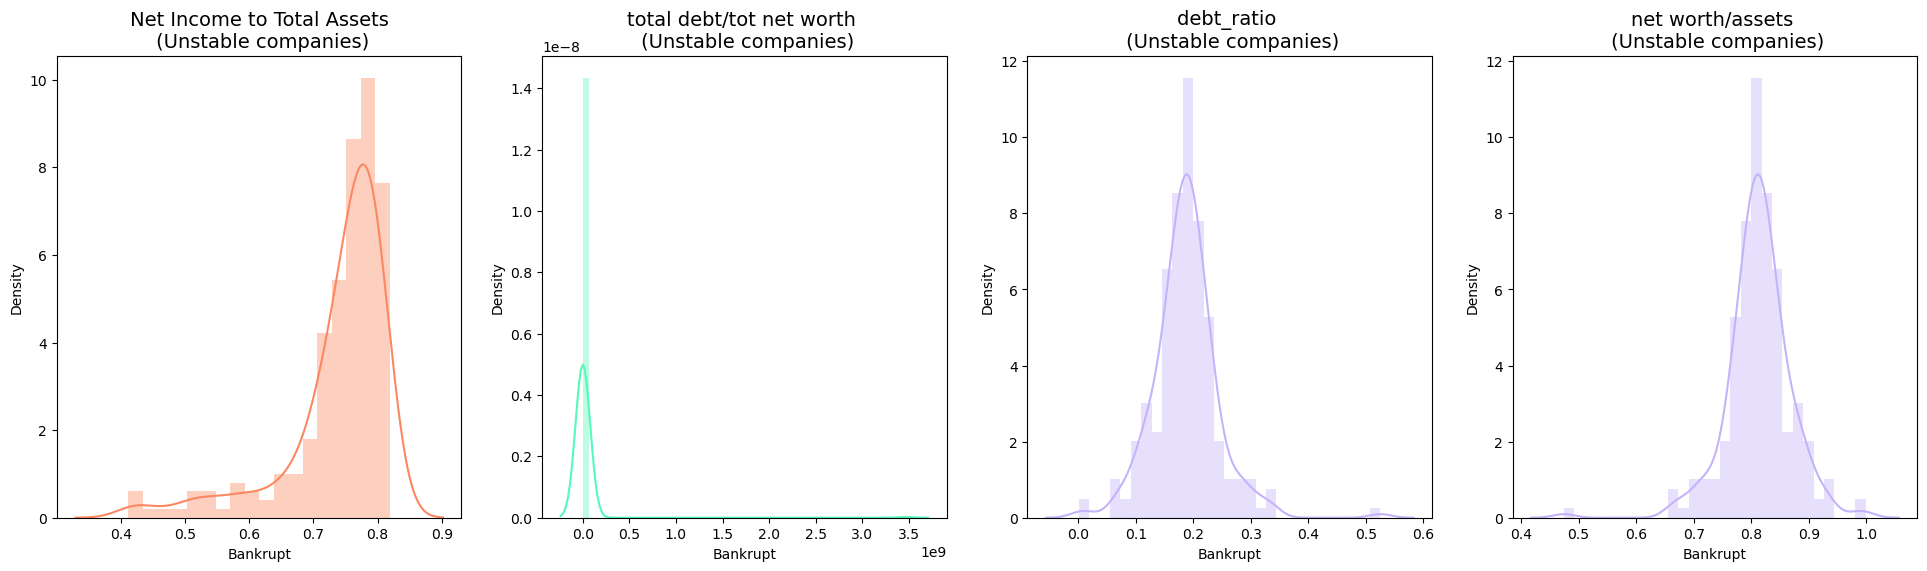

In [17]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = data[' Net Income to Total Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)
ax1.set_xlabel('Bankrupt')

tot_debt_net = data[' Total debt/Total net worth'].loc[data['Bankrupt'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)
ax2.set_xlabel('Bankrupt')

debt_ratio = data[' Debt ratio %'].loc[data['Bankrupt'] == 1].values
sns.distplot(debt_ratio,ax=ax3, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)
ax3.set_xlabel('Bankrupt')

net_worth_assets = data[' Net worth/Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)
ax4.set_xlabel('Bankrupt')

plt.show()

The above graph shows for continuous data variables VS Bankrupt. I used this distribution to find the matching possible distribution.

Distribution of features for companies that are close to bankruptcy

# Visualization - 7 correlated attributes Categorical - Numerical variables

<AxesSubplot:>

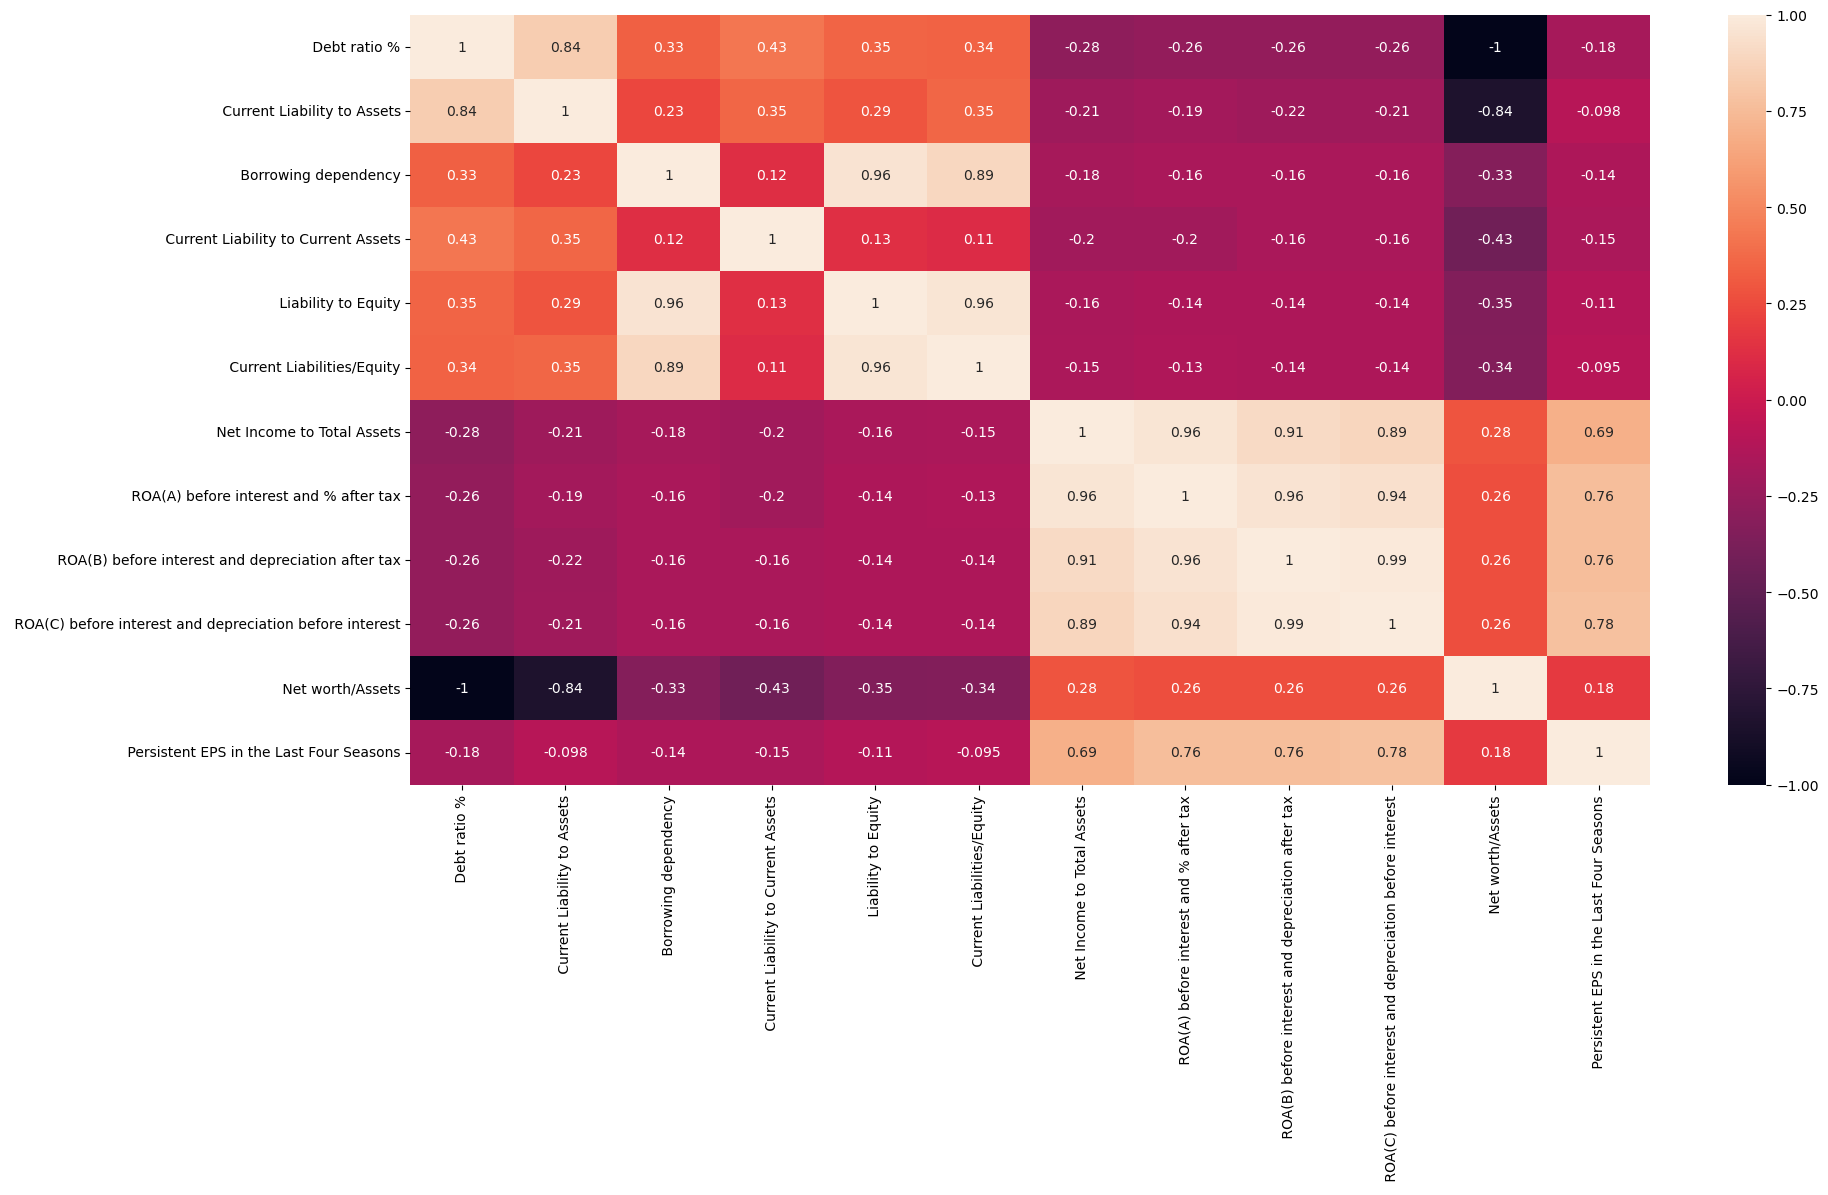

In [18]:
numeric = data.dtypes[data.dtypes != 'int64'].index

positive_corr = data[numeric].corrwith(data["Bankrupt"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data[numeric].corrwith(data["Bankrupt"]).sort_values()[:6].index.tolist()

positive_corr = data[positive_corr + ["Bankrupt"]].copy()
negative_corr = data[negative_corr + ["Bankrupt"]].copy()

# Chart - 13 visualization code

relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(20,10))
sns.heatmap(data[relation].corr(),annot=True)


From the above we observed several correlations among the top 12 attributes, one of which being “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.

Rest all correlation can be depicted from the above chart.

# Feature engineering

1. There are no missing values to handle in the given dataset.

# Columns Manipulation

We have a problem regarding the large number of features to choose from.  RFE  is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable. Model based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. For this case, we are going to use a random forest classifier, since it usually yields good results and because this is a classification task.

In [19]:

y = data['Bankrupt']
X = data.drop('Bankrupt', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [20]:
# determining optimal number of Columns
n_features = [5, 10, 15, 20, 25, 30, 35, 40]
for i in n_features:
    # Building the model based Columns selection
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

    select.fit(X_train, y_train)

    mask = select.get_support()

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    
    print("Test score: {:.3f}".format(score), " number of features: {}".format(i))


Test score: 0.969  number of features: 5
Test score: 0.968  number of features: 10
Test score: 0.970  number of features: 15
Test score: 0.972  number of features: 20
Test score: 0.970  number of features: 25
Test score: 0.970  number of features: 30
Test score: 0.971  number of features: 35
Test score: 0.968  number of features: 40


On the above we found the 15 columns are required for best model

In [25]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=15)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(15))

features = pd.DataFrame({'features':list(data.iloc[:,:-1].keys()), 'select':list(mask)})
features = list(features[features['select']==True]['features'])
features.append('Bankrupt')


Test score: 0.971  number of features: 15


In [26]:
data_df = data[features]


data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0    Non-industry income and expenditure/revenue  6819 non-null   float64
 1    Interest-bearing debt interest rate          6819 non-null   float64
 2    Net Value Per Share (B)                      6819 non-null   float64
 3    Persistent EPS in the Last Four Seasons      6819 non-null   float64
 4    Net Value Growth Rate                        6819 non-null   float64
 5    Interest Expense Ratio                       6819 non-null   float64
 6    Net worth/Assets                             6819 non-null   float64
 7    Borrowing dependency                         6819 non-null   float64
 8    Net profit before tax/Paid-in capital        6819 non-null   float64
 9    Cash/Total Assets                            6819 non-null   f

In [23]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  
  model= RandomForestClassifier(n_estimators=550) # Create the random forest eith hyperparameters
  
  model.fit(x,y)
  
  importances= model.feature_importances_
  
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  
  final_df= final_df.sort_values('Importances')
  
  return final_df

In [27]:
# Getting feature importance of selected features
randomforest_embedded(x=data_df.drop(["Bankrupt"],axis=1),y=data_df["Bankrupt"])

,Features,Importances
11,No-credit Interval,0.056606
1,Interest-bearing debt interest rate,0.057935
0,Non-industry income and expenditure/revenue,0.060191
6,Net worth/Assets,0.060562
2,Net Value Per Share (B),0.060997
10,Net Income to Total Assets,0.060998
14,Equity to Liability,0.061544
13,Degree of Financial Leverage (DFL),0.064840
9,Cash/Total Assets,0.065038
8,Net profit before tax/Paid-in capital,0.066375


# Data Splitting

In [28]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop(labels=['Bankrupt'], axis=1),
    data_df['Bankrupt'],
    test_size=0.20,
    random_state=0)

X_train.shape, X_test.shape

((5455, 15), (1364, 15))

# Data Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ML Model Implementation

### Decision Tree Classifier

In [35]:
Decision_classifier = DecisionTreeClassifier()


param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=Decision_classifier, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)
Best_perameters = grid_search.best_params_


# Print the best hyperparameters
print("Best hyperparameters:", Best_perameters)

# Print the best accuracy score
print("Best accuracy score:", grid_search.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best accuracy score: 0.96993583868011


In [54]:
#Decission Tree Model
dt_model = DecisionTreeClassifier(**Best_perameters)

# Fit the Algorithm
dt_model=dt_model.fit(X_train,y_train)

# Predict on the model
train_class_preds = dt_model.predict(X_train)
test_class_preds = dt_model.predict(X_test)

accuracy = best_rf_classifier.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.9648093841642229


[[5281    0]
 [ 172    2]]


[Text(0, 0.5, 'Stable'), Text(0, 1.5, 'Unstable')]

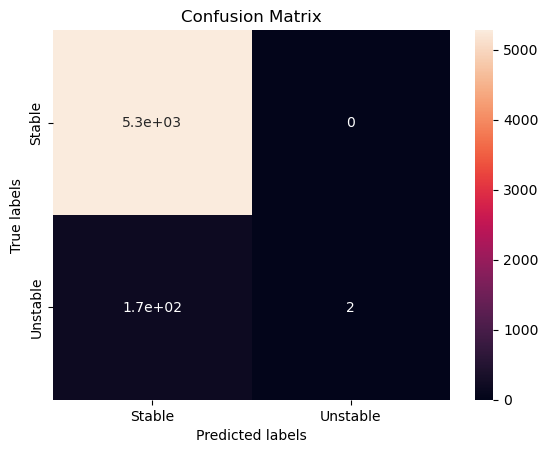

In [41]:
#Visualizing evaluation Metric Score chart For Train Data

labels = ['Stable', 'Unstable']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1318    0]
 [  46    0]]


[Text(0, 0.5, 'Stable'), Text(0, 1.5, 'Unstable')]

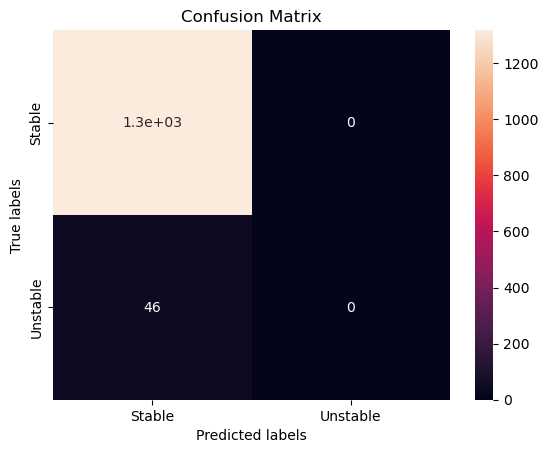

In [42]:
# Get the confusion matrix for test

labels = ['Stable', 'Unstable']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [43]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5453
           1       0.01      1.00      0.02         2

    accuracy                           0.97      5455
   macro avg       0.51      0.98      0.50      5455
weighted avg       1.00      0.97      0.98      5455

 
roc_auc_score
0.5057471264367817


### Random Forest Classifier

In [55]:
rf_classifier = RandomForestClassifier()

# Define the hyper-parameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyper-parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, n_jobs=3)
grid_search.fit(X_train, y_train)

# Get the best hyper-parameters
best_params = grid_search.best_params_
print("Best hyper-parameters:", best_params)



Best hyper-parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [56]:
#Random Forest classifier
best_rf_classifier = RandomForestClassifier(**best_params)

# Train the model with the best hyper-parameters
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = best_rf_classifier.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.968475073313783


[[5276    5]
 [ 148   26]]


[Text(0, 0.5, 'Stable'), Text(0, 1.5, 'Unstable')]

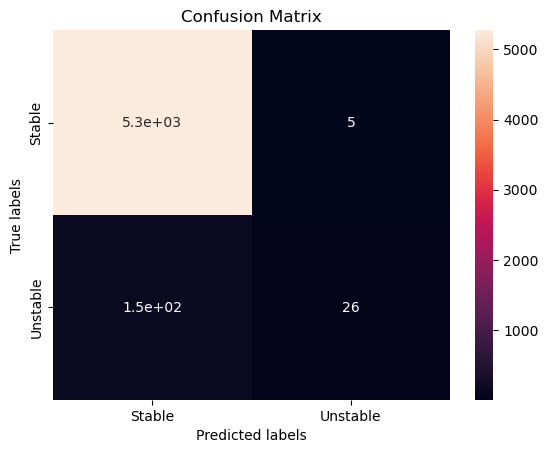

In [57]:
# Visualizing evaluation Metric Score chart for Train Data

labels = ['Stable', 'Unstable']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1309    9]
 [  42    4]]


[Text(0, 0.5, 'Stable'), Text(0, 1.5, 'Unstable')]

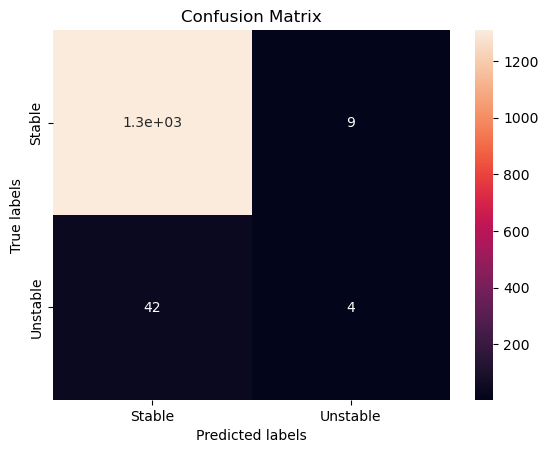

In [58]:
# Get the confusion matrix for Test Data

labels = ['Stable', 'Unstable']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [59]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5424
           1       0.15      0.84      0.25        31

    accuracy                           0.97      5455
   macro avg       0.57      0.91      0.62      5455
weighted avg       0.99      0.97      0.98      5455

 
roc_auc_score
0.574239248487856


In [60]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1351
           1       0.09      0.31      0.14        13

    accuracy                           0.96      1364
   macro avg       0.54      0.64      0.56      1364
weighted avg       0.98      0.96      0.97      1364

 
roc_auc_score
0.5400639968331463


# Conclusion:

In this project, we developed and evaluated two machine learning models, namely Decision Tree and Random Forest, for predicting bankruptcy. The objective of the project was to build robust models that could effectively classify companies as bankrupt or non-bankrupt based on various financial features.

Both the Decision Tree and Random Forest models showed promising results in terms of predictive performance. However, after thorough evaluation, we found that the Random Forest model outperformed the Decision Tree model in terms of accuracy and generalization to unseen data.

The Random Forest model achieved an accuracy of 0.968 on the test dataset, while the Decision Tree model achieved an accuracy of 0.964. This indicates that the Random Forest model was better able to capture the complex relationships between the input features and the target variable.

Furthermore, we conducted feature importance analysis to identify the most influential features in predicting bankruptcy. The analysis revealed were the most important features which are given below in both models, highlighting their significance in determining the financial health of companies.

' Non-industry income and expenditure/revenue',
' Interest-bearing debt interest rate', 
' Net Value Per Share (B)',
' Persistent EPS in the Last Four Seasons', 
' Net Value Growth Rate',
' Interest Expense Ratio', 
' Net worth/Assets', 
' Borrowing dependency',
' Net profit before tax/Paid-in capital', 
' Cash/Total Assets',
' Net Income to Total Assets', 
' No-credit Interval',
' Net Income to Stockholder's Equity',
' Degree of Financial Leverage (DFL)', 
' Equity to Liability'

Overall, the results of this project demonstrate the effectiveness of machine learning techniques in predicting bankruptcy and provide valuable insights for stakeholders, such as investors and financial institutions, in assessing the risk associated with potential investments.

In future work, we could explore additional feature engineering techniques, fine-tuning of hyperparameters, and alternative algorithms to further improve the predictive performance of the models.


## Feel free to customize this conclusion based on your specific results and findings from your project.